### Un altro passo: arrivano le banche!
#### Sempre in azione l'*Istituto Centrale di Statistica* con a fianco la *Banca d'Italia*

use it in [Notebook viewer](https://nbviewer.org/github/terna/ejmmp/blob/main/model02/model02.ipynb) or explore it in [GitHub](https://github.com/terna/ejmmp/tree/main/model02) (with the tools.py and metaActions.py files)

to force the updatem if missing, follow once [Notebook viewer and flush cache](https://nbviewer.org/github/terna/ejmmp/blob/main/model02/model02.ipynb?flush_cache=true)

[Wikipedia as a memo](https://en.wikipedia.org/wiki/Stock-flow_consistent_model#cite_note-42)

In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import random as r
import matplotlib.pyplot as plt
import commonVar as cmv
import numpy as np
from tools import *
from metaActions import *
import sys

### Stock-flow *model02*, with real and financial elements

- The model also consider the monetary side of the economy.

  

- We have to initialize loans and capital stocks.

  

- Currently, entrepreneurs have unlimited funds that they put freely in their activities, balancing other agent negative cash, if any.

  

- Saving is abstension from consuming, increasing agents' liquidity.



- Investments are uniquely for replacement, without technical progress.

  

### symbol table

[symbol table](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols) in $\LaTeX$

$a_i$ -  with $a_i \in \mathbf{A}$; agent number $N=|\mathbf{A}|$, `agentList` and`agentNum`

$a^e_i$ -  with $a^e_i \in \mathbf{A^e}$ and $\mathbf{A^e} \subset \mathbf{A}$; employer number $N^e=|\mathbf{A^e}|$ in range $[N^e_{min},N^e_{max}]$, `employerList`

$\mathbf{F}$ - firms' set, with $f_j \in \mathbf{F}$ being $N^f = |\mathbf{F}|$,  with $N^f = |\mathbf{F}| = |\mathbf{A^e}|$ , `firmList`

$\mathbf{A}^w$ - working agents' set, being $\mathbf{A}^w \subseteq \mathbf{A}$, with $N^w_i=|\mathbf{A}^w_i|$ number of working agents employed by employer $i$, also including self-employed employers, with $a_i \in \mathbf{A}^e$

$\mathbf{B}$ - banks' set, with $b_j \in \mathbf{B}$ being $N^b = |\mathbf{B}|$, `bankList`

$x^d$ - interest rate on deposits, `interestRateOnDeposits`

$x^{l^a}$ - interest rate on loans to (private) agents, `interestRateOnLoansVsAgents`

$x^{l^f}$ - interest rate on loans to firms, `interestRateOnLoansVsFirms`

$X^d_{a|f|b}$ - amount of positive interest on deposits for a given interval $t$ for agents $a$ or firms $f$, and negative for banks $b$, `interestOnDeposits`

$X^l_{a|f|b}$ - amount of negative interest on loanss for a given interval $t$ for agents $a$ or firms $f$, and positive for banks $b$, `interestOnLoans`

$p$ - price `price`

$u$ - unemployment rate `unemploymentRate`

$dimensional~heterogeneity$ is a $true/false$ chooser, forcing increasing firms to attract more workers. `dimensionalHeterogeneity`

$\pi_{i,t}$ - labor productivity, a uniformly distributed decimal number in range $[\pi_{min},\pi_{max}]$,`productivity`

&Delta;$\pi_{i,t}$ - uniperiodal additive productivity correction in range $[$&Delta;$\pi_{min},$ &Delta;$\pi_{max}]$, `productivityDelta`

$n_{i,t}$ - number of workers in a firm

$q_{i,t}$ - production in quantity, `production`

$\Pi_{i,t}$ - profit, `profit`

$\rho$ - dividend distribution share, `rho`

$W$ - wage `wage`

$R_{i,t}$ - revenues, `revenues`

$s_{i,t}$ - sales in quantity, `sales`

$v_{i,t}$ - in**v**entories (final, initial), `initialInventories`, `finalInventories`

$d_{i}$ - deperibility share of the production, `deperibilityShare`, setting $d_{max}$

$c_{i,t}$ - consumption rate, a uniformly distributed decimal number in range $[c_{min},c_{max}]$,`consumptionRate`

$C_{i,t}$ - consumption of $i$ in $t$

$I_{i,t}$  - investment plan  of $i$ in $t$, a uniformly distributed realization in range $[I_{min},I_{max}]$,`investmentProgram`

$H_{i,t}$  - high powered money (cash) held by individuals (also acting as employers), `cashMoney`

$M1_{i,t}$ - checking account money deposits held by  $a_i$ at time $t$, `checkingAccount`

$M1^f_{i,t}$ - firm's bank account (with positive or negative balance), `bankAccount`

the investment and consumption actions are repeated in each cycle, looking around randomly for the sellers; currently `nOfConsumptionActions` $=30$ and `nOfInvestmentActions`$=10$; each consumption buy action is at maximum the 20% of the planned consumptions in that cycle; instead, each investment buy action can reach the whole amount of the investment program of the cycle; each buy action is limited by the residual capabilty of the seller

**magically**, the same good can be a consumption item or an investment one

$T$ - number of cycles `ncycles`

$t$ - current cycle `cycle`


### agent structure

The structure of a **generic agent**: it can represent an employer, a worker, an unemployed person.

When an agent is created, the **initialization process** defines:

- its numerical id, `num`
- its entrepreneur status, `entrepreneur`, set to $false$
- the id of its employer, `myEmployer`, set to $0$
- if entrepreneur, the id of its firm, `myFirm`, set to $0$
- $c_{i,0}$ - consumption rate, set to $0$
- $H_{i,0}$ - cash money, set to $0$ 
- $M1_{i,0}$ - checking account money deposits, set to $0$



## firm structure

- $R_{i,0}$ - `revenues`, initial value  $0$
- $s_{i,0}$ - `sales`, initial value  $0$
- $v^i_{i,0}$ - in**v**entories, `initialInventories`, set to $0$ 
- $v^f_{i,0}$ - in**v**entories, `finalInventories`, set to $0$ 
- $d_{i}$ - deperibility share, a uniformly distributed decimal number in range $[0,d_{max}]$,`deperibilityShare`
- $I_{i,0}$  - investment plan, set to $0$
- $\Pi_{i,0}$ - profit, set to $0$, being the related dividend $D_{i,0}$, set to $0$
- $M1^f_{i,0}$ - firm's bank account, set to $0$
- $\pi_{i,t-1}$ is set after the initialization step, if an agent becomes an employer



each **generic agent** has the **functions**:

- **buyConsumptionGoods** 

$C_{i,t}=c_{i,t} (W+D_{i,t-1}+X^d_{i,t-1}-X^l_{i,t-1})$; using $D_{i,t-1},X^d_{i,t-1},X^l_{i,t-1}$ we introduce lags with (possible) cyclical effect


  being $bu$ the buyer and $se$ the seller (firm), for each fraction $C_{i,t}/k$ 

  ($k$ is the number of buying actions in each cycle with random share [0,cmv.maxConsumptionShareInSubstep))

  &Delta;$M1^f_{se,t}=C_{bu,t}/k$

  &Delta;$M1_{bu,t}=-C_{bu,t}/k$




each **firm** has the **functions**:

- **produce** function, with:

  $\pi_{i,t}=\pi_{i,t-1}+$&Delta;$\pi_{i,t}$

  $q_{i,t}=n_{i,t} \pi_{i,t}$

  

- **payWages**

  paying $W$ to each worker in each time $t$

  &Delta;$M1_{i,t}=W$ for  $a_i \in \mathbf{A}^w$ 

  &Delta;$M1^f_{i,t}=-W \mathbf{N}^w_i$ for $a_i \in \mathbf{A}^e$ 

  

- **buyInvestmentGoods**

  $I_{j,t}$ for $f_j \in \mathbf{F}$  ($I_{j,t}$ is exogenously set)

  being $bu$ the buyer (firm) and $se$ the seller (firm), for each fraction $I_{j,t}/k$

  ($k$ is the number of investment actions in each cycle, with random share [0,cmv.maxInvestmentShareInSubstep))

  &Delta;$M1^f_{se,t}=I_{bu,t}/k$

  &Delta;$M1^f_{bu,t}=-I_{bu,t}/k$

  

- **makeBalanceSheet**

  $v^f_{i,t}=v^i_{i,t}+(q_{i,t}-s_{i,t}) (1 - d_{i})$

  $R_{i,t}=p s_{i,t}+X^d_{i,t}$

  $\Pi_{i,t}=R_{i,t}-W n_{i,t}-X^l_{i,t}-p(v^f_{i,t}-v^i_{i,t})$


## bank structure

to be completed **:-)**



In [3]:
class Agent():
    def __init__(self, num):
        self.num=num
        self.entrepreneur=False
        #self.myFirm=0
        self.myEnterprise=0
        self.myEmployer=0
        self.consumptionRate=0
        self.cashMoney=0
        self.checkingAccount=0
        self.perceivedWage=0
        self.perceivedDividend=0
        self.myBank=0
        self.interestOnDeposits=0
        self.interestOnLoans=0

    def buyConsumptionGoods(self,k):
        if k==0: 
            self.consumptionRate=r.uniform(cmv.consumptionRateMin,cmv.consumptionRateMax)
            self.consumption=(self.perceivedWage+self.perceivedDividend+\
                self.interestOnDeposits-self.interestOnLoans)*self.consumptionRate
            if self.consumption < 0: self.consumption=0 

            self.interestOnDeposits=0
            self.interestOnLoans=0
            self.perceivedWage=0
            self.perceivedDividend=0
            self.madeConsumption=0
                
        r.shuffle(cmv.firmList)
        mySeller=cmv.firmList[0]
        self.purchase=r.uniform(0,cmv.maxConsumptionShareInSubstep)*self.consumption 
                            # mean value should be calibrated with thenumber of buy action
        self.purchase=min(self.purchase,self.consumption-self.madeConsumption)
        self.purchase=min(self.purchase,cmv.price*(mySeller.production+\
                                        mySeller.initialInventories-mySeller.sales))
        mySeller.sales+=self.purchase/cmv.price
        mySeller.bankAccount+=self.purchase
        #self.consumption-=self.purchase
        self.checkingAccount-=self.purchase
        self.madeConsumption+=self.purchase
    


In [4]:
class Firm():
    def __init__(self, num):
        self.num=num
        self.myWorkers=[]
        self.myEntrepreneur=0
        self.productivity=0
        self.initialInventories=0
        self.finalInventories=0
        self.bankAccount=0
        self.revenues=0 #sales*price
        self.sales=0
        self.deperibilityShare=r.uniform(0,cmv.maxDeperibilityShare)
        self.investmentProgram=0
        self.profit=0
        self.madeInvestment=0
        self.interestOnDeposits=0
        self.interestOnLoans=0
        self.myBank=0
        
    def produce(self):
        self.initialInventories=self.finalInventories
        self.productivity+=r.uniform(cmv.productivityDeltaMin,cmv.productivityDeltaMax)
        self.productivity=max(self.productivity,0)
        
        self.production=len(self.myWorkers)*self.productivity
        self.sales=0

    def payWages(self):
        for anAgent in self.myWorkers:
            anAgent.perceivedWage=cmv.wage
            anAgent.checkingAccount+=cmv.wage
        self.bankAccount-=cmv.wage*len(self.myWorkers)
            
    def buyInvestmentGoods(self,k):
        if k==0: 
            self.investmentProgram=r.uniform(cmv.investmentMin,cmv.investmentMax)
            self.madeInvestment=0
                       
        r.shuffle(cmv.firmList)
        mySeller=cmv.firmList[0]
        self.myInvestment=r.uniform(0,cmv.maxInvestmentShareInSubstep)*self.investmentProgram
        self.myInvestment=min(self.myInvestment,cmv.price*(mySeller.production+\
                              mySeller.initialInventories-mySeller.sales))
        mySeller.sales+=self.myInvestment/cmv.price
        mySeller.bankAccount+=self.myInvestment
        
        self.bankAccount-=self.myInvestment
        self.investmentProgram-=self.myInvestment
        self.madeInvestment+=self.myInvestment
        
    def makeBalanceSheet(self):
        self.lostProduction=0
        if self.production - self.sales > 0: 
            self.lostProduction=(self.production - self.sales)*self.deperibilityShare
        #print(self.num, lostProduction,self.productivity)
        self.finalInventories=self.initialInventories+self.production-\
                              self.sales-self.lostProduction
        self.revenues=self.sales*cmv.price
        self.profit=self.revenues - len(self.myWorkers)*cmv.wage + \
          self.interestOnDeposits - self.interestOnLoans + \
          (self.finalInventories-self.initialInventories)*cmv.price
        self.interestOnDeposits=0
        self.interestOnLoans=0
        #print(self.num,self.profit,self.revenues,len(self.myWorkers)*cmv.wage,\
        #      self.finalInventories, self.initialInventories)
        
    def distributeDividend(self):
        if self.profit > 0:
            dividend=cmv.rho*self.profit
            self.bankAccount-=dividend
            self.myEntrepreneur.checkingAccount+=dividend
            self.myEntrepreneur.perceivedDividend=dividend        


In [5]:
class Bank(Firm):
    def __init__(self, num):
        super().__init__(num)
        self.myPrivateClients=[]
        self.myCommercialClients=[]
        self.myDebtsVsAgents=0
        self.myDebtsVsFirms=0
        self.myCreditsVsAgents=0
        self.myCreditsVsFirms=0
        self.interestOnDeposits=0
        self.interestOnLoans=0
        
    def computeAndApplyInterests(self):
        self.interestOnDeposits=0
        self.interestOnLoans=0
        
        for aPrivateClient in self.myPrivateClients:
            if aPrivateClient.checkingAccount >=0:
                interests=aPrivateClient.checkingAccount*cmv.interestRateOnDeposits
                self.interestOnDeposits-=interests
                aPrivateClient.checkingAccount+=interests
                aPrivateClient.interestOnDeposits=interests
                
            if aPrivateClient.checkingAccount < 0:
                interests=aPrivateClient.checkingAccount*cmv.interestRateOnLoansVsAgents
                self.interestOnLoans+=interests
                aPrivateClient.checkingAccount-=interests
                aPrivateClient.interestOnLoans=interests
               
        for aCommercialClient in self.myCommercialClients:
            if aCommercialClient.bankAccount >=0:
                interests=aCommercialClient.bankAccount*cmv.interestRateOnDeposits
                self.interestOnDeposits-=interests
                aCommercialClient.bankAccount+=interests
                aCommercialClient.interestOnDeposits=interests

            if aCommercialClient.bankAccount < 0:
                interests=aCommercialClient.bankAccount*cmv.interestRateOnLoansVsFirms
                self.interestOnLoans+=interests
                aCommercialClient.bankAccount-=interests
                aCommercialClient.interestOnLoans=interests
        
    def makeFinancialAccounts(self):
        self.myDebtsVsAgents=0
        self.myDebtsVsFirms=0
        self.myCreditsVsAgents=0
        self.myCreditsVsFirms=0

        for aPrivateClient in  self.myPrivateClients:
            if aPrivateClient.checkingAccount>=0: \
                self.myDebtsVsAgents-=aPrivateClient.checkingAccount
            if aPrivateClient.checkingAccount<0: \
                self.myCreditsVsAgents+=aPrivateClient.checkingAccount
        for aCommercialClient in  self.myCommercialClients:
            if aCommercialClient.bankAccount>=0: \
                self.myDebtsVsFirms-=aCommercialClient.bankAccount
            if aCommercialClient.bankAccount<0: \
                self.myCreditsVsFirms+=aCommercialClient.bankAccount
        
        

### agent setup

- agent basic creation

  

- creation of entrepreneur list

  

- selecting entrepreneurs and creating their firms or their banks

  

- with a given (heterogeneous) productivity

  

- linking the firm or the bank to its entrepreneur, considering the entrepreneur itself as a worker in its firm or bank

  

- creation of a temporary workforce list of to-be-employed agent, escluding entrepreneurs (already self employed)

  

- applying the unmployement rate to exclude agents

  

- assigning workforce (to-be-employed agents) to firms of banks, with a reinforcement mechanism, gradually giving more attraction/hiring capability to firms or banks growing the most


- assigning agents and firms to banks in a random way



In [6]:
def setup():
    cmv.agentList=[]
    for n in range(cmv.agentNum):
        anAgent=Agent(n+1)
        cmv.agentList.append(anAgent)

    
    # creation of entrepreneur list
    cmv.entrepreneurNum=r.randint(entrepreneurMin, entrepreneurMax)
    cmv.bankNum=r.randint(bankMin, bankMax)
    
    cmv.entrepreneurList=[]
    cmv.firmList=[]
    cmv.bankList=[]
    entrepreneurCandidates=cmv.agentList.copy()

    for n in range(cmv.entrepreneurNum):
        
        i=r.randint(0,len(entrepreneurCandidates)-1)
        
        entrepreneurCandidates[i].entrepreneur=True

        if len(cmv.bankList) < cmv.bankNum:
            newEnterprise=Bank(entrepreneurCandidates[i].num)
        else:
            newEnterprise=Firm(entrepreneurCandidates[i].num)

        entrepreneurCandidates[i].myEnterprise=newEnterprise
        entrepreneurCandidates[i].myEmployer=newEnterprise
        newEnterprise.myEntrepreneur=entrepreneurCandidates[i]
        newEnterprise.myWorkers.append(entrepreneurCandidates[i])
        newEnterprise.productivity=\
                r.uniform(cmv.productivityMin,cmv.productivityMax)
        cmv.entrepreneurList.append(entrepreneurCandidates.pop(i))
        if newEnterprise.__class__.__name__=="Bank": cmv.bankList.append(newEnterprise)
        if newEnterprise.__class__.__name__=="Firm": cmv.firmList.append(newEnterprise)

    cmv.firmNum=len(cmv.firmList)
    
    # creation of workforce list
    toBeEmployed=[]

    for anAgent in cmv.agentList:
        if not anAgent.entrepreneur: toBeEmployed.append(anAgent)
    for k in range(round(cmv.unemploymentRate*cmv.agentNum)):
        toBeEmployed.pop(r.randint(0,len(toBeEmployed)))
    #len(toBeEmployed)


    # assigning workforce to firms and banks
    tmpEnterpriseListWithDuplications=cmv.firmList+cmv.bankList
    for anAgent in toBeEmployed:
        choice=r.choice(tmpEnterpriseListWithDuplications)
        anAgent.myEmployer=choice
        choice.myWorkers.append(anAgent)
        if cmv.dimensionalHeterogeneity: tmpEnterpriseListWithDuplications.append(choice)
            
            
    # assigning agents and firms to banks
    
    for anAgent in cmv.agentList:
        anAgent.myBank=r.choice(cmv.bankList)
        anAgent.myBank.myPrivateClients.append(anAgent)
            
    for aFirm in cmv.firmList:
        aFirm.myBank=r.choice(cmv.bankList)
        aFirm.myBank.myCommercialClients.append(aFirm)

    cmv.totalProductionSeries=[]
    cmv.totalProductionInfraVarSeries=[]
    cmv.totalProfitSeries=[]
    cmv.totalProfitInfraVarSeries=[]
    cmv.totalInitialInventoriesSeries=[]
    cmv.totalInitialInventoriesInfraVarSeries=[]
    cmv.totalFinalInventoriesSeries=[]
    cmv.totalFinalInventoriesInfraVarSeries=[]
    cmv.totalConsumptionSeries=[]
    cmv.totalEntrepreneurConsumptionSeries=[]
    cmv.totalNonEntrepreneurConsumptionSeries=[]
    cmv.totalConsumptionInfraVarSeries=[]
    cmv.totalInvestmentSeries=[]
    cmv.totalInvestmentInfraVarSeries=[]
    cmv.totalCashMoneySeries=[]
    cmv.totalCashMoneyInfraVarSeries=[]
    cmv.totalCheckingAccountSeries=[]
    cmv.totalCheckingAccountInfraVarSeries=[]
    cmv.totalBankAccountSeries=[]
    cmv.totalBankAccountInfraVarSeries=[]

    cmv.totalLostProductionSeries=[]

### meta actions (in `metaActions.py`)





- *produceAll* orders to the firms to produce and to collects the results

  

- *payWagesAll* orders to the firms to pay wages, also to the entrepreneurs

  

- *buyConsumptionGoodsAll* orders to the agents to buy consumption goods

  

- *buyInvestmentGoodsAll* orders to the firms to buy investment goods

  

- *buyConsumptionOrInvestmentGoodsAll* orders to the agents and to the firms to buy consumption or investment goods

  

- *makeBalanceSheetAll* with firm making accounts

  

- *distributeDividendAll* attributing the $\rho$ share of firm profits to the entrepreneurs 

  

- *accountCashMoneyAll* summarizing eveyone cash money at the end of a cycle

  

- *accountCheckingAccountAll* summarizing eveyone checking accounts at the end of a cycle

  

- *accountBankingAccountAll* summarizing firm banking accounts at the end of a cycle

  

- *computeAndApplyInterestsAll* calculating the interests on deposits and loans for each agent and firm (and symmetrically for banks) and updatating accounts

  

- *makeBankFinancialAccountsAll* summmarinzing all the checking and banl accounts


### model parameters



In [7]:
cmv.agentNum=100
entrepreneurMin=6
entrepreneurMax=20
bankMin=2
bankMax=3 

if bankMax > entrepreneurMin:
    print ("Bank maximum number cannot exceed the minimum number of firms!")
    sys.exit(0)

cmv.price=1

cmv.unemploymentRate=0
cmv.dimensionalHeterogeneity=True

cmv.productivityMin=0.8
cmv.productivityMax=1.2
cmv.productivityDeltaMin=cmv.productivityMin-1
cmv.productivityDeltaMax=cmv.productivityMax-1

cmv.maxDeperibilityShare=0.5

cmv.wage=1
cmv.rho=0 #0.5 #1
cmv.consumptionRateMin=0.5
cmv.consumptionRateMax=1

cmv.investmentMin=1
cmv.investmentMax=15

cmv.nOfConsumptionActions=30
cmv.maxConsumptionShareInSubstep=0.3
cmv.nOfInvestmentActions=10
cmv.maxInvestmentShareInSubstep=0.3

cmv.interestRateOnDeposits=0.01
cmv.interestRateOnLoansVsAgents=0.03
cmv.interestRateOnLoansVsFirms=0.10

cmv.ncycles=100
cmv.cycle=0

## <p style="color:red">model machine</p>

- a random seed determining the random number sequences



- a list of actions (meta ones)



- an engine excecuting the meta actions



- display tools (their code is hidden into the file `tools.py`)




-------------------------------------------
entrepreneur number 15
-------------------------------------------

-------------------------------------------
"national" accounts
-------------------------------------------

t	total	lost	initial		consum.	invest.	final
	produc.	produc.	invent.				invent.
  1	86.3	0.0	0.0	    |	43.1	43.2	0.0
  2	79.0	0.0	0.0	    |	35.0	44.1	0.0
  3	73.6	0.0	0.0	    |	37.2	36.4	0.0
  4	73.0	0.0	0.0	    |	39.0	34.0	0.0
  5	73.4	0.0	0.0	    |	29.4	44.0	0.0
  6	73.3	0.0	0.0	    |	30.9	42.4	0.0
  7	65.6	0.0	0.0	    |	32.9	32.7	0.0
  8	66.1	0.0	0.0	    |	32.3	33.8	0.0
  9	66.8	0.0	0.0	    |	27.2	39.6	0.0
 10	69.9	0.0	0.0	    |	32.0	38.0	0.0
 11	70.6	0.0	0.0	    |	31.5	39.1	0.0
 12	68.4	0.0	0.0	    |	30.0	38.4	0.0
 13	68.3	0.0	0.0	    |	37.7	30.6	0.0
 14	66.5	0.0	0.0	    |	30.4	36.1	0.0
 15	73.4	0.0	0.0	    |	31.8	41.7	0.0
 16	73.4	0.0	0.0	    |	36.4	37.0	0.0
 17	74.2	0.0	0.0	    |	34.8	39.4	0.0
 18	75.9	0.0	0.0	    |	39.7	36.1	0.0
 19	72.8	0.0	0.0	    |	29.0	43.7	

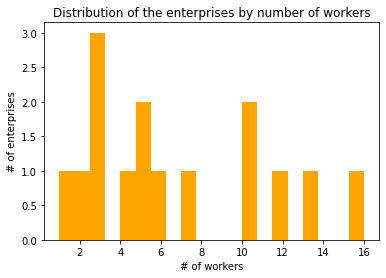

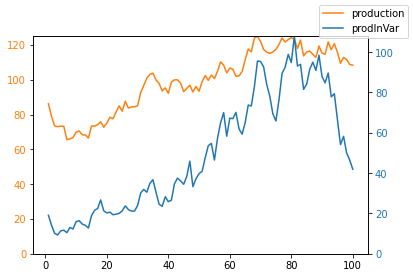

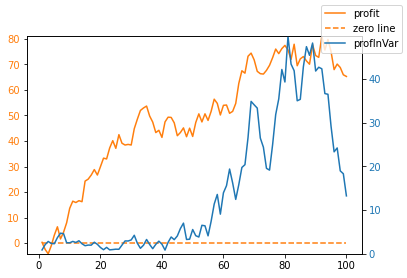

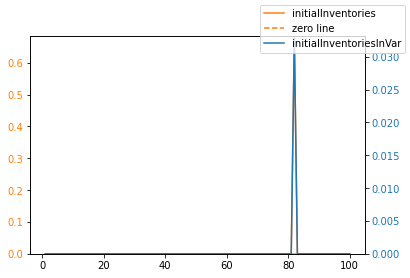

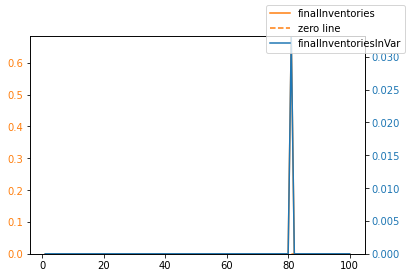

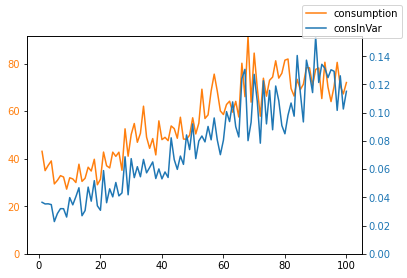

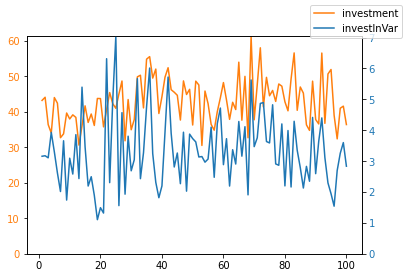

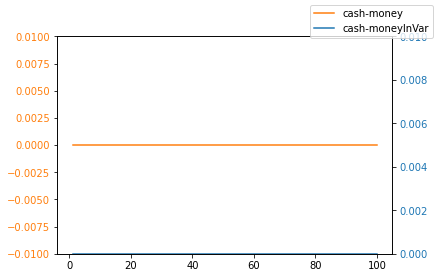

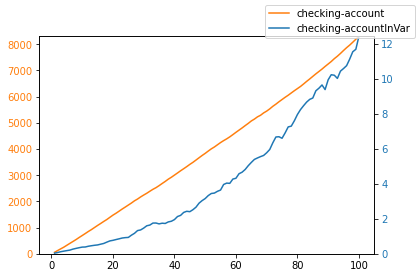

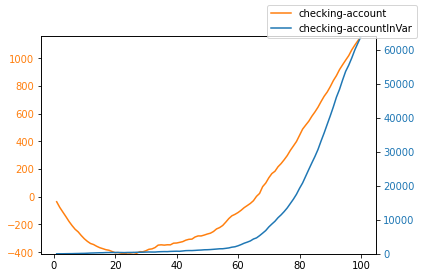

In [8]:
r.seed(12131415)

setup()

cmv.actionList=["produceAll()","payWagesAll()","buyConsumptionOrInvestmentGoodsAll()",\
                "computeAndApplyInterestsAll()","makeBalanceSheetAll()",\
                "distributeDividendAll()","accountCashMoneyAll()",\
                "accountCheckingAccountAll()","accountBankAccountAll()",\
                "makeBankFinancialAccountsAll()"\
                ]

for cmv.cycle in range(cmv.ncycles):
    for anAction in cmv.actionList:
            exec(anAction)

makeHist() 
plot1()
plot2()
plot3()
plot4()
plot5()
plot6()
plot7()
plot8()
plot9()

nationalAccounts()

In [9]:
list(cmv.firmList[i].num for i in range(cmv.firmNum))

[99, 41, 61, 38, 86, 57, 70, 76, 63, 80, 64, 26, 98]

In [10]:
list(cmv.entrepreneurList[i].num for i in range(cmv.firmNum))

[74, 69, 76, 70, 99, 41, 98, 63, 61, 57, 38, 26, 86]

In [11]:
# last cycle
tCashNe=0
for anA in cmv.agentList:
    if not anA.entrepreneur: tCashNe+=anA.cashMoney

tCashE=0
for anA in cmv.agentList:
    if anA.entrepreneur: tCashE+=anA.cashMoney

In [12]:
tCashNe

0

In [13]:
tCashE

0

In [14]:
tC=0
for i in range(cmv.ncycles):
    tC+=cmv.totalConsumptionSeries[i]

In [15]:
tC

5603.714893511443

In [16]:
tCE=0
for i in range(cmv.ncycles):
    tCE+=cmv.totalEntrepreneurConsumptionSeries[i]

In [17]:
tCE

837.9112622620207

In [18]:
tCNe=0
for i in range(cmv.ncycles):
    tCNe+=cmv.totalNonEntrepreneurConsumptionSeries[i]

In [19]:
tCNe

4765.803631249423

In [20]:
tI=0
for i in range(cmv.ncycles):
    tI+=cmv.totalInvestmentSeries[i]

In [21]:
tI

4291.669390762115

In [22]:
cmv.totalCheckingAccountSeries

[57.49394676302098,
 123.75305894171373,
 188.43513352008227,
 251.88339388612616,
 325.7240903774059,
 398.80563169198615,
 470.6043913593327,
 543.706139708312,
 622.6823304433461,
 697.634226486273,
 773.8110851772558,
 852.274967762345,
 923.7538158713197,
 1003.2404802007794,
 1082.1946663592134,
 1157.2480563677134,
 1234.6621095157018,
 1307.8717555057,
 1392.6363662745493,
 1475.884497856525,
 1548.4461045292992,
 1627.5412285296875,
 1708.3590941068878,
 1783.2755965418933,
 1860.727739603027,
 1937.1892930793394,
 2022.1033952635735,
 2090.2550688591928,
 2170.707411731876,
 2242.7500100971583,
 2310.8502531364456,
 2387.6035016716664,
 2461.329394547305,
 2524.2617937513787,
 2600.983050051669,
 2683.2016545993174,
 2762.1070938864164,
 2848.73340156437,
 2921.7678088852863,
 3003.4968398978067,
 3085.079321186922,
 3168.878219287487,
 3247.275082824155,
 3327.5842722593857,
 3412.796456813923,
 3489.9329643067204,
 3577.0945713616093,
 3665.246781711749,
 3752.5168235900737

In [23]:
cmv.totalBankAccountSeries

[-36.06896859712033,
 -76.58514355099385,
 -110.19234759446992,
 -143.3803344354828,
 -177.80923368596444,
 -207.95532390111075,
 -234.76502681955117,
 -253.82463650896682,
 -280.18486438689956,
 -303.5401720392312,
 -322.36855359947384,
 -337.5548706092674,
 -345.1167470223425,
 -357.48924575969886,
 -367.83800033389923,
 -374.8892563782275,
 -382.31963325671734,
 -386.3921728806268,
 -395.2195396565305,
 -403.92356380211055,
 -402.9369255453868,
 -408.12651431985086,
 -412.0470053004627,
 -406.0812676056525,
 -406.78960996698424,
 -403.08399196517263,
 -408.3783221838776,
 -396.55650263044197,
 -397.75242474684694,
 -390.0691720102472,
 -379.5664171153052,
 -376.5866855600275,
 -367.00785470461943,
 -349.42150123627187,
 -347.17109872675,
 -349.4746107344961,
 -346.85356999883334,
 -347.3826428831168,
 -335.34238529758244,
 -334.226500026445,
 -329.4295502790635,
 -324.18161038676107,
 -313.6833763716864,
 -307.47587910975926,
 -306.14597313615036,
 -290.8799866912586,
 -282.94806182

In [24]:
for anItem in cmv.bankList:
    print(len(anItem.myWorkers))

4
6


In [25]:
for aBank in cmv.bankList:
    print(aBank.num, list(aBank.myPrivateClients[i].num \
                          for i in range(len(aBank.myPrivateClients))))
    print(aBank.num, list(aBank.myCommercialClients[i].num \
                          for i in range(len(aBank.myCommercialClients))))

74 [3, 7, 8, 9, 12, 14, 15, 17, 18, 19, 22, 23, 25, 26, 27, 29, 31, 32, 33, 34, 36, 37, 42, 44, 48, 52, 53, 55, 56, 57, 59, 61, 64, 66, 68, 69, 71, 72, 74, 77, 78, 85, 86, 87, 88, 89, 90, 93, 97, 100]
74 [76, 70, 99, 38, 26]
69 [1, 2, 4, 5, 6, 10, 11, 13, 16, 20, 21, 24, 28, 30, 35, 38, 39, 40, 41, 43, 45, 46, 47, 49, 50, 51, 54, 58, 60, 62, 63, 65, 67, 70, 73, 75, 76, 79, 80, 81, 82, 83, 84, 91, 92, 94, 95, 96, 98, 99]
69 [41, 98, 63, 61, 57, 86, 64, 80]


In [26]:
for aBank in cmv.bankList:
    print(aBank.num, aBank.myDebtsVsAgents, aBank.myCreditsVsAgents,\
                     aBank.myDebtsVsFirms,  aBank.myCreditsVsFirms)  

74 -4158.745069987662 0 -36.38094670879913 -98.9045972651427
69 -4140.619548094029 0 -1414.6738745926896 -193.88531450411088


In [27]:
for aBank in cmv.bankList:
    #aBank.computeAndApplyInterests()
    print(aBank.num,aBank.interestOnDeposits,aBank.interestOnLoans)

74 -41.535901155410514 -10.989399696126966
69 -55.002905175116034 -21.54281272267899


In [28]:
cmv.bankList[1].myEntrepreneur in cmv.bankList[1].myPrivateClients

False

In [30]:
len(cmv.bankList[0].myWorkers)

4